Bài 2
Thực hiện K-means trên bộ dữ liệu CA Housing. Dữ liệu trong file housing_ca.csv

Bạn tự chọn 1 hoặc nhiều đặc trưng, sao cho sau khi phân cụm có thể rút ra được thông tin đáng chú ý nào đó.

## Đọc dữ liệu 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv("housing_ca.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Từ bảng dữ liệu trên ta rút ra được 4 đặc trưng tiềm năng nhất là 

`Population,housing_median_age,median_income,Median_house_value`

Trước tiên,cần xem mối quan hệ của chúng nhờ pair plot

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hu

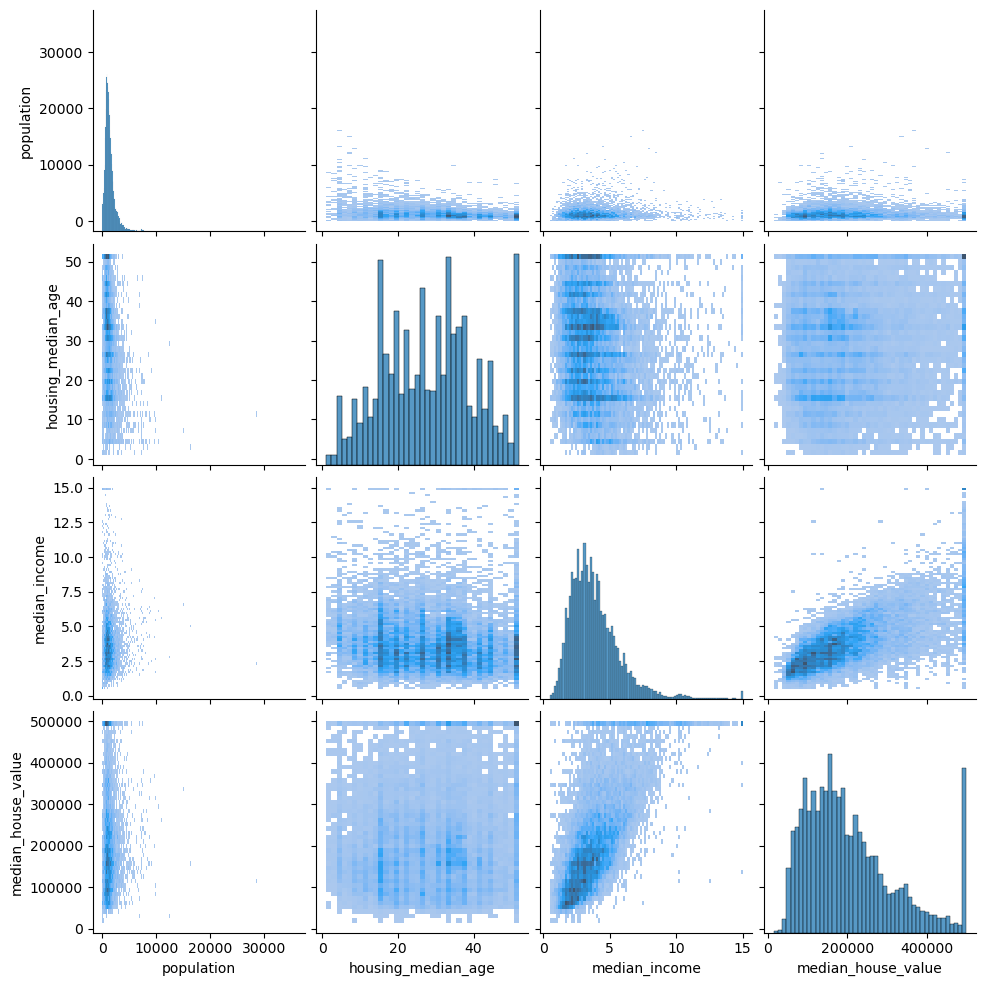

In [2]:
sns.pairplot(df[['population','housing_median_age','median_income','median_house_value']],kind="hist",palette="deep")

Ta cần chọn ra một số features để thực hiện phân cụm với K-means.Với phân bố trên,ta có thể chọn `population` và `median_income` làm hai đặc trưng.

có thể thử với nhiều cặp đặc trưng khác nhau.Cần thử cho đến khi tìm được các đặc trưng giúp việc phân cụm có ý nghĩa nhất.

Nếu chọn ra >2 đặc trưng để tiến hành phân cụm,sẽ khó trực quan các cụm để hiểu ý nghĩa của từng cụm.

Cũng có thể chọn ra 1 đặc trưng để phân cụm(VD Population,median_income,...). Nhưng thay vì làm như vậy,ta có thể dùng scatterplot với tham số hue để trực quan hóa cho nhanh.

## Hai đặc trưng được chọn là Median_income và Population

### Tách dữ liệu:

In [3]:
x=df.loc[:,["median_income","population"]].values
x

array([[8.3252e+00, 3.2200e+02],
       [8.3014e+00, 2.4010e+03],
       [7.2574e+00, 4.9600e+02],
       ...,
       [1.7000e+00, 1.0070e+03],
       [1.8672e+00, 7.4100e+02],
       [2.3886e+00, 1.3870e+03]])

### Scale du lieu:

In [4]:
sc=StandardScaler()
x_scaler=sc.fit_transform(x)
x_scaler

array([[ 2.34476576, -0.9744286 ],
       [ 2.33223796,  0.86143887],
       [ 1.7826994 , -0.82077735],
       ...,
       [-1.14259331, -0.3695372 ],
       [-1.05458292, -0.60442933],
       [-0.78012947, -0.03397701]])

## Phan cum voi phuong phap elbow

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

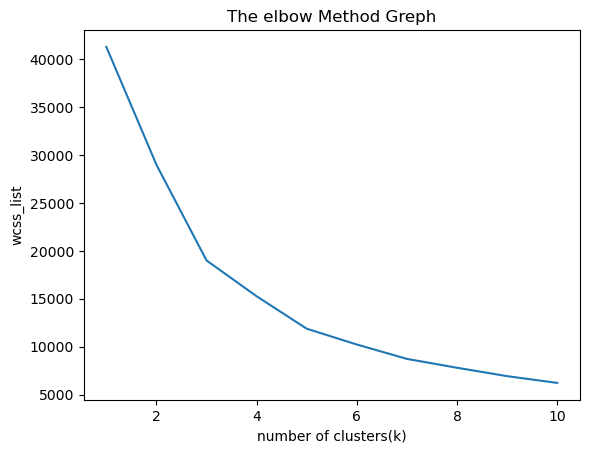

In [5]:
from sklearn.cluster import KMeans
wcss_list=[]
#thu voi k=1 den 10
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)#khoi tao mo hinh
    kmeans.fit(x_scaler)#huan luyen
    wcss_list.append(kmeans.inertia_)#tinh wcss
plt.plot(range(1,11),wcss_list)
plt.title("The elbow Method Greph")
plt.xlabel("number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

Theo biểu đồ trên,ta chọn điểm Elbow là K=5

## Huấn luyện mô hình

In [6]:
k=5
kmeans=KMeans(n_clusters=k,init="k-means++",random_state=42)#Khoi tao mo hinh
kmeans.fit(x_scaler)#huan luyen
y_predict=kmeans.predict(x_scaler)#du doan

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Truc quan hoa ket qua 

Trực quan hóa với phân cụm 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9476\3460465127.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x[y_predict == i,0],x[y_predict ==i,1],s=15,c=colors[i],label=f'Cluster {i+1}')


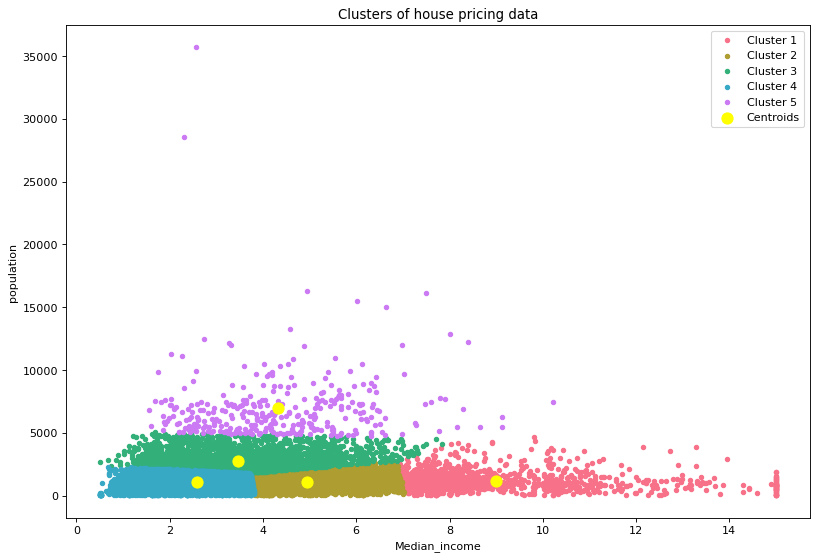

In [7]:
plt.figure(figsize=(12,8),dpi=80)
colors=sns.color_palette("husl",k)#tao ra k mau
for i in range(k):
    plt.scatter(x[y_predict == i,0],x[y_predict ==i,1],s=15,c=colors[i],label=f'Cluster {i+1}')
    
kmeans.cluster_centers_=sc.inverse_transform(kmeans.cluster_centers_)#tinh lai tam
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="yellow",label="Centroids")#Ve cac tam
plt.title("Clusters of house pricing data")
plt.xlabel("Median_income")
plt.ylabel("population")
plt.legend()
plt.show()

**Nhận xét** :Kmeans chia dữ liệu làm 5 cụm 

* Cụm 1: Thu nhập thấp,mật độ dân số thấp
* Cụm 2: Thu nhập trung bình,mật độ dân số thấp
* Cụm 3: Thu nhập thấp và trung bình,mật độ dân số trung bình
* cụm 4: Thu trung thấp và trung bình,mật độ dân số cao
* Cụm 5: Thu nhập cao,mật độ dân số thấp

### Trực quan hóa các cụm trên bản đồ :

<Axes: xlabel='longitude', ylabel='latitude'>

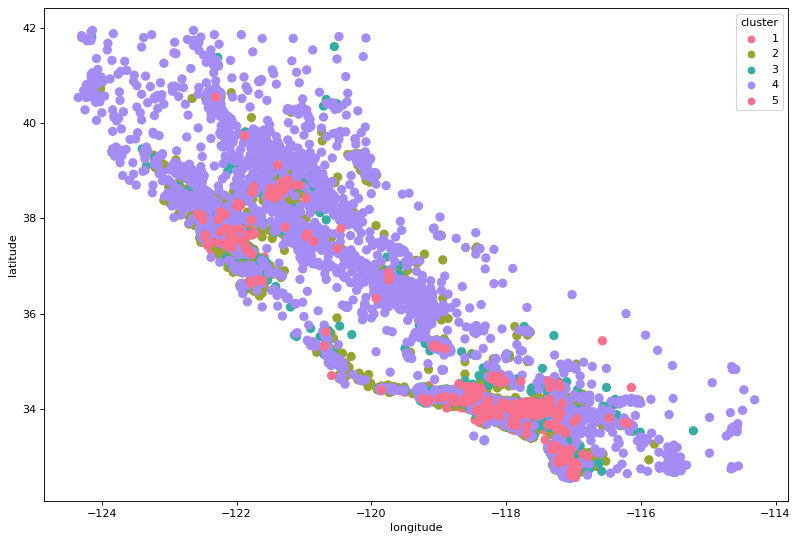

In [8]:
df["cluster"]=y_predict+1
tmp_df=df.sort_values(by="cluster")

plt.figure(figsize=(12,8),dpi=80)
sns.scatterplot(data=tmp_df, x='longitude', y='latitude', hue='cluster', s=70, linewidth=0, palette="husl")


Hiển thị tất cả các cụm trên bản đồ sẽ khó nhìn.

### Ta sẽ tách riêng từng cụm :

C:\Users\Admin\AppData\Local\Temp\ipykernel_9476\2590230901.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df["cluster"]==i],x='longitude',y='latitude',color=colors[i-1],s=10,linewidth=0,palette="rocket")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9476\2590230901.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df["cluster"]==i],x='longitude',y='latitude',color=colors[i-1],s=10,linewidth=0,palette="rocket")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9476\2590230901.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tmp_df["cluster"]==i],x='longitude',y='latitude',color=colors[i-1],s=10,linewidth=0,palette="rocket")
C:\Users\Admin\AppData\Local\Temp\ipykernel_9476\2590230901.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=tmp_df[tm

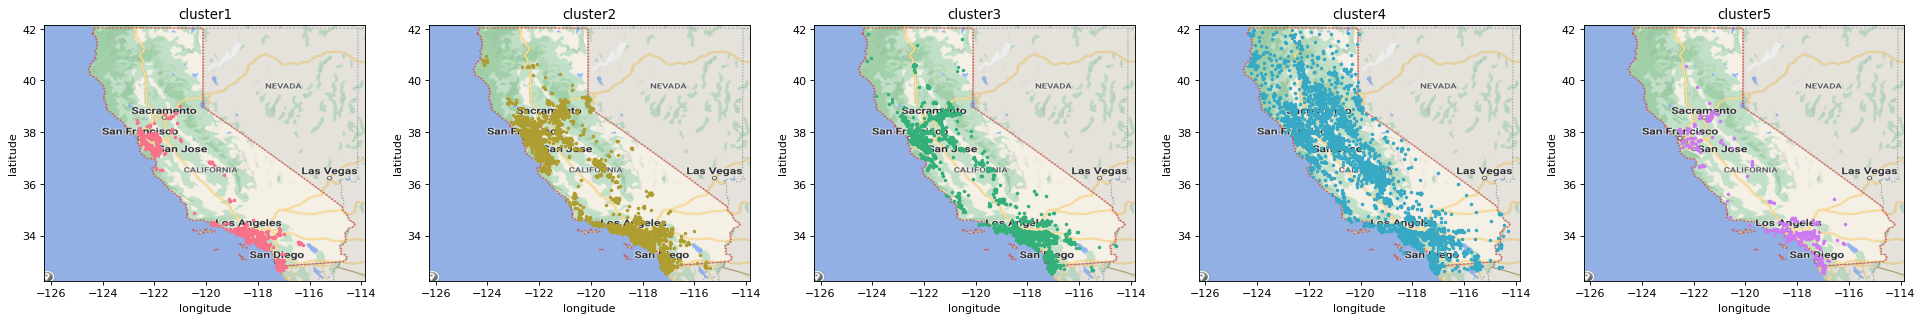

In [10]:
plt.figure(figsize=(30,8),dpi=80)

california_img=plt.imread("cali_map.png")
colors=sns.color_palette("husl",k)#Tao ra k mau

for i in range(1,k+1):
    plt.subplot(1,k,i)
    sns.scatterplot(data=tmp_df[tmp_df["cluster"]==i],x='longitude',y='latitude',color=colors[i-1],s=10,linewidth=0,palette="rocket")
    plt.title(f'cluster{i}')
    plt.imshow(california_img,extent=[-126.25,-113.85,32.25,42.15],alpha=1)

**Nhận xét**:
* cụm 1(Dân số đông,thu nhập thấp) phân bố rộng khắp
* Cụm 2 (Dân số đông,thu nhập trung bình) phân bố ở Scramento,San Francisco, San Jose,LA, và San Diego
* ...